In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import MeCab

In [2]:
yt_br = pd.read_csv('datasets/BR_youtube_trending_data.csv')
yt_br.head(2)
# # yt_us.isna().any()
# # yt_us.info()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...


In [3]:
#First make the category of the video from json file
br_category = pd.read_json('datasets/BR_category_id.json')
br_category = br_category['items']

#make a new dataframe that correspond to category on json files
genre_id= []
genre = []

for i in range(0, len(br_category)-1):
    genre_id.append(str(br_category[i]).split(", ")[2].split(': ')[-1].strip("'"))
    genre.append(str(br_category[i]).split(", ")[3].split(': ')[-1].strip("'"))

genre = pd.DataFrame(list(zip(genre_id, genre)), columns=['id', 'genre']).set_index('id')
yt_br['category'] = yt_br['categoryId'].apply(lambda x : genre.loc[str(x)]['genre'] if x != 29 else "Nonprofits & Activism") 

#drop unrelated columns
yt_br.drop(['categoryId', 'channelId', 'video_id', 'thumbnail_link'], axis=1, inplace=True)

#Then let's change the published and trending date format
yt_br['publishedAt'] = pd.to_datetime(yt_br['publishedAt'], format='%Y-%m-%dT%H:%M:%S')
yt_br['trending_date'] = pd.to_datetime(yt_br['trending_date'], format='%Y-%m-%dT%H:%M:%S')

In [4]:
yt_br_trend = yt_br.groupby('trending_date').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_br_trend.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_br_trend['date'] = date

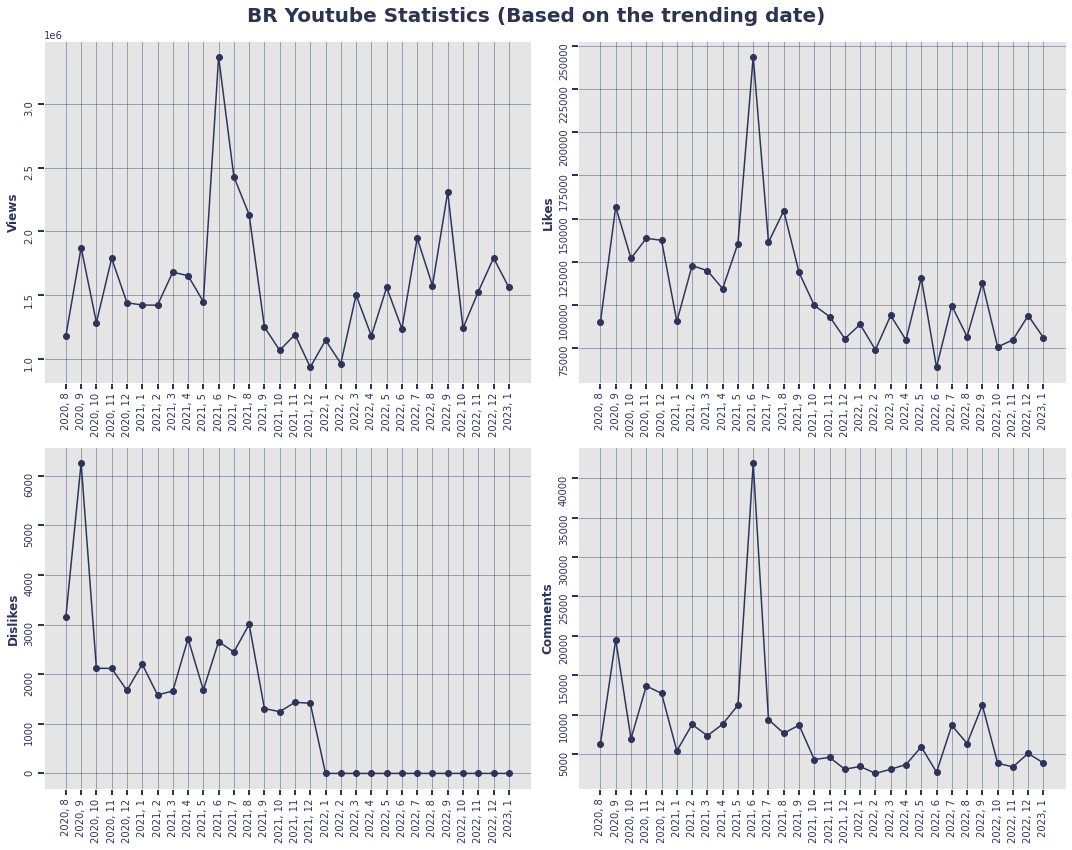

In [5]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_br_trend['date'], yt_br_trend['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_br_trend['date'], yt_br_trend['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_br_trend['date'], yt_br_trend['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_br_trend['date'], yt_br_trend['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("BR Youtube Statistics (Based on the trending date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

In [6]:
yt_br_published = yt_br.groupby('publishedAt').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_br_published.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_br_published['date'] = date

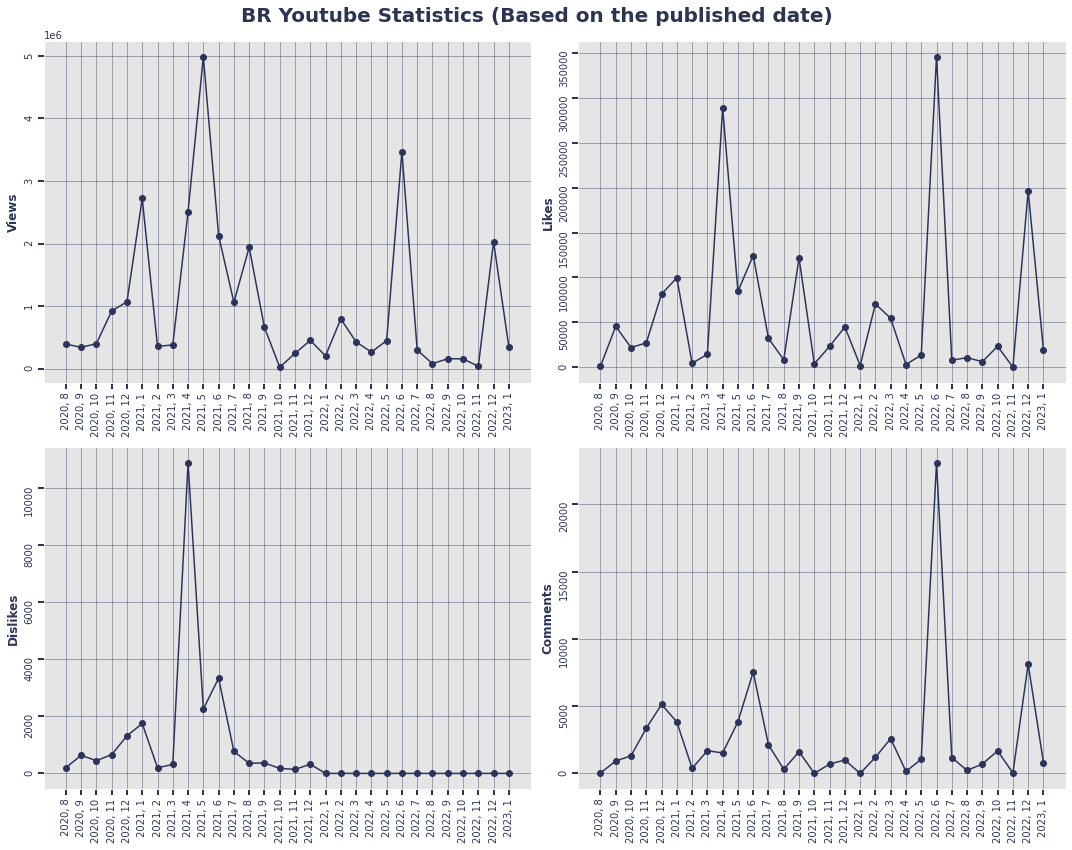

In [7]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_br_published['date'], yt_br_published['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_br_published['date'], yt_br_published['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_br_published['date'], yt_br_published['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_br_published['date'], yt_br_published['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("BR Youtube Statistics (Based on the published date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

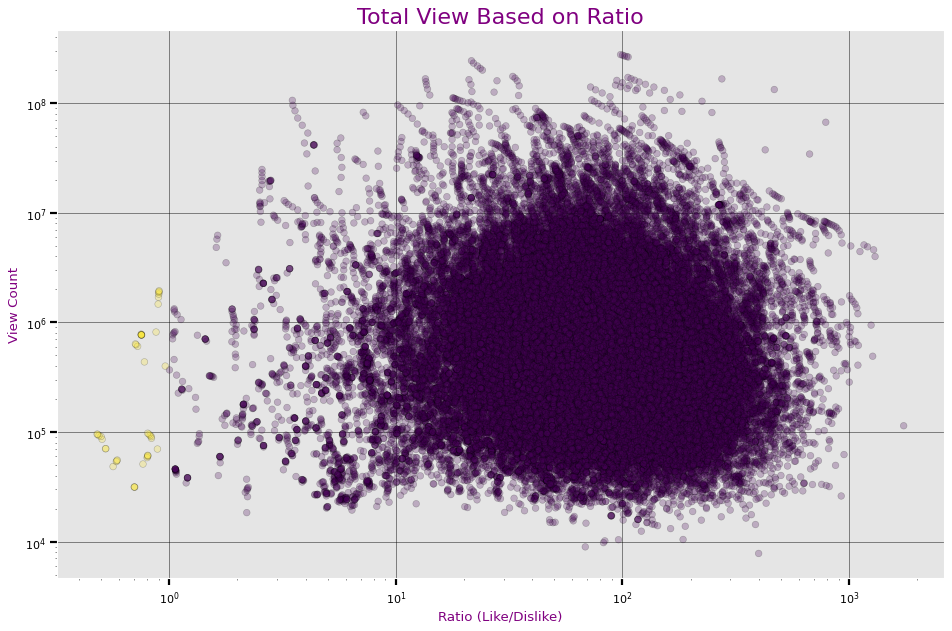

In [8]:
yt_br['ratio'] = yt_br['likes'] / yt_br['dislikes']

plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(yt_br['ratio'], yt_br['view_count'], c=yt_br['ratio'] < 1, alpha=.25, edgecolors='black')
plt.xscale("log") 
plt.yscale("log")
plt.xlabel('Ratio (Like/Dislike)', fontsize=12, color='purple')
plt.ylabel('View Count', fontsize=12, color='purple')
plt.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)

plt.title('Total View Based on Ratio', fontsize=20, color='purple')
plt.tight_layout()
plt.show()

In [9]:
yt_br['day_to_trend'] = (yt_br['trending_date'] - yt_br['publishedAt']).dt.days
yt_br['day_to_trend'].describe()

count    176391.000000
mean          3.576809
std           2.534559
min          -1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          33.000000
Name: day_to_trend, dtype: float64

In [10]:
#Create a new df that spesifics to certain years
yt_br_2020 = yt_br[yt_br.trending_date.dt.year == 2020]
yt_br_2021 = yt_br[yt_br.trending_date.dt.year == 2021]
yt_br_2022 = yt_br[yt_br.trending_date.dt.year == 2022]

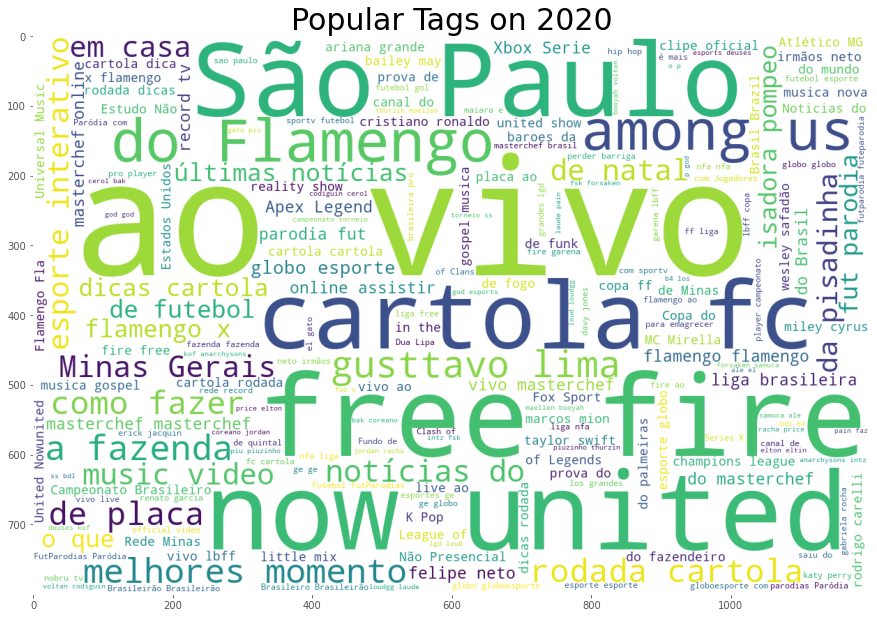

In [12]:
# yt_us_2020.head(2)
yt_br_2020_tags = []

for i in yt_br_2020['tags']:
    for j in str(i).split('|'):
        yt_br_2020_tags.append(j)
br_tags_2020 = " ".join([word for word in yt_br_2020_tags])

br_wc_2020 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(br_tags_2020)
plt.title("Popular Tags on 2020", fontsize=30)
plt.grid(False)
plt.imshow(br_wc_2020)

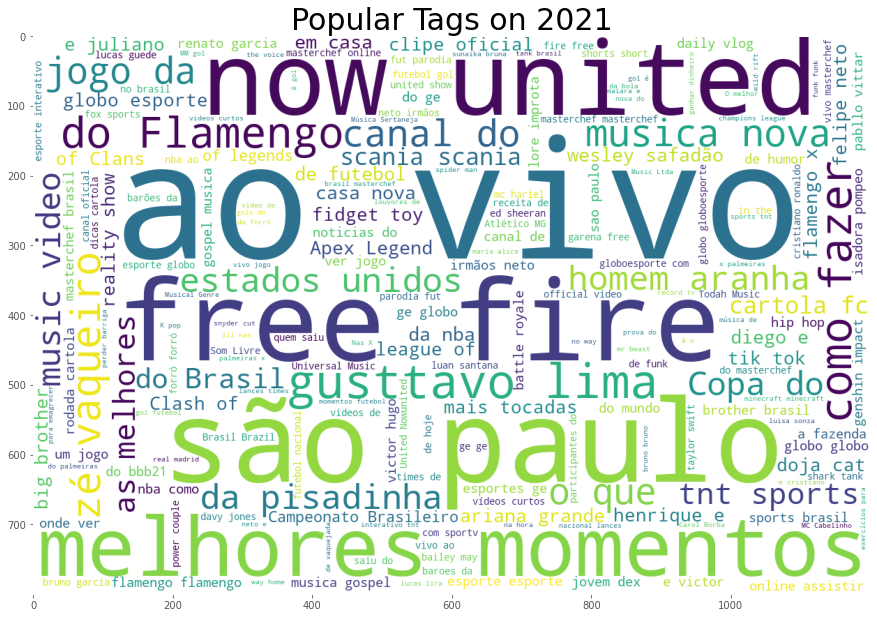

In [14]:
# yt_us_2020.head(2)
yt_br_2021_tags = []

for i in yt_br_2021['tags']:
    for j in str(i).split('|'):
        yt_br_2021_tags.append(j)
br_tags_2021 = " ".join([word for word in yt_br_2021_tags])

br_wc_2021 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(br_tags_2021)
plt.title("Popular Tags on 2021", fontsize=30)
plt.grid(False)
plt.imshow(br_wc_2021)

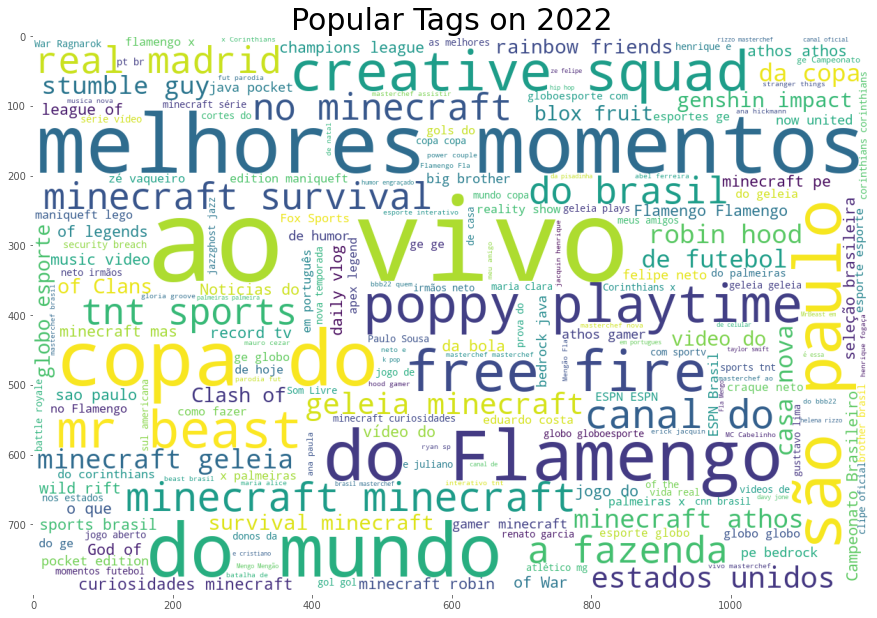

In [16]:
# yt_us_2020.head(2)
yt_br_2022_tags = []

for i in yt_br_2022['tags']:
    for j in str(i).split('|'):
        yt_br_2022_tags.append(j)
br_tags_2022 = " ".join([word for word in yt_br_2022_tags])

br_wc_2022 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(br_tags_2022)
plt.title("Popular Tags on 2022", fontsize=30)
plt.grid(False)
plt.imshow(br_wc_2022)

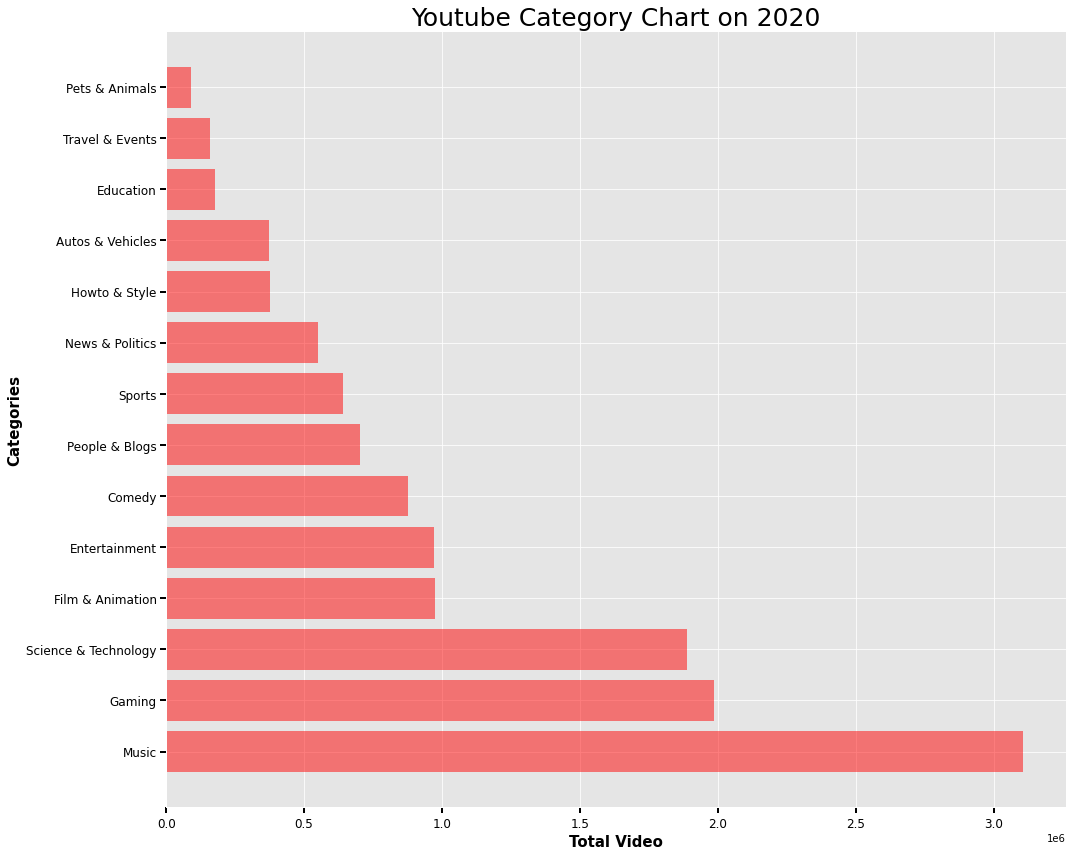

In [17]:
yt_br_2020_category = yt_br_2020.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_br_2020_category.index, yt_br_2020_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2020', fontsize=25)

plt.tight_layout()
plt.show()

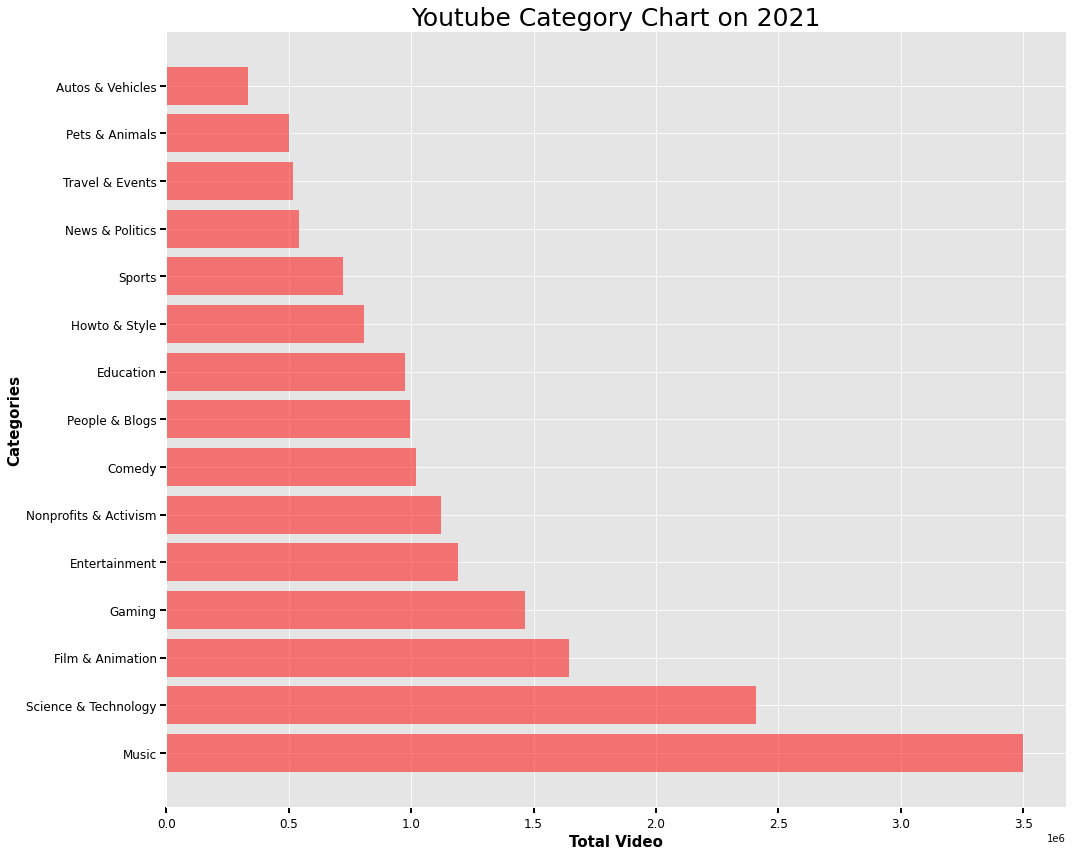

In [18]:
yt_br_2021_category = yt_br_2021.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_br_2021_category.index, yt_br_2021_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2021', fontsize=25)

plt.tight_layout()
plt.show()

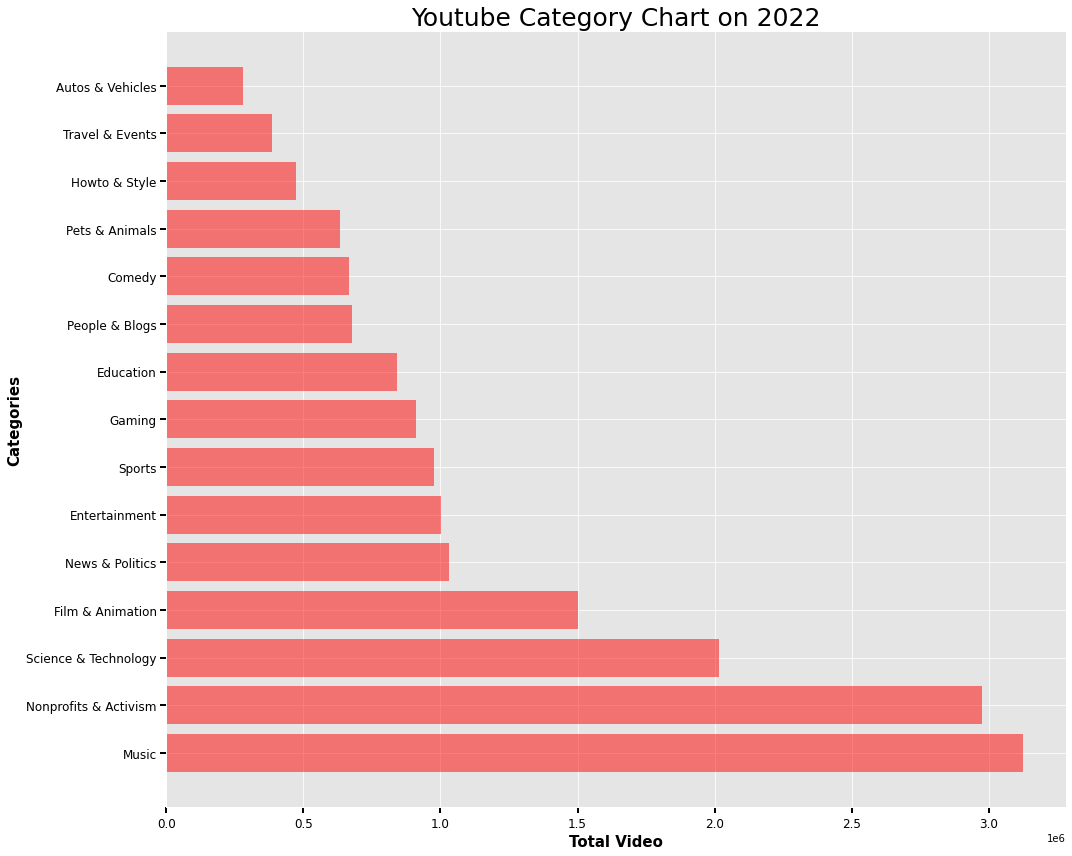

In [19]:
yt_br_2022_category = yt_br_2022.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_br_2022_category.index, yt_br_2022_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2022', fontsize=25)

plt.tight_layout()
plt.show()